In [1]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def onehot(labels):
    n_sample = len(labels)
    n_class = max(labels) + 1
    onehot_labels = np.zeros((n_sample, n_class))
    onehot_labels[np.arange(n_sample), labels] = 1

    return onehot_labels

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((-1, 784))
train_labels = onehot(train_labels)
test_images = test_images.reshape((-1, 784))
test_labels = onehot(test_labels)

In [4]:
labels = {0: 'T-shirt', 
          1: 'Trouser', 
          2: 'pullover', 
          3: 'Dress', 
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [5]:
x = tf.placeholder(tf.float32, shape=(None, 784))
y = tf.placeholder(tf.float32, shape=(None, 10))

w1 = tf.Variable(tf.random_normal(shape=(784, 784), stddev=0.01))
b1 = tf.Variable(tf.zeros(shape=(784)))
w2 = tf.Variable(tf.random_normal(shape=(784, 256), stddev=0.01))
b2 = tf.Variable(tf.zeros(shape=(256)))
w3 = tf.Variable(tf.random_normal(shape=(256, 10), stddev=0.01))
b3 = tf.Variable(tf.zeros(shape=(10)))

hidden_layer1 = tf.add(tf.matmul(x, w1), b1)
hidden_layer2 = tf.add(tf.matmul(hidden_layer1, w2), b2)
pred = tf.add(tf.matmul(hidden_layer2, w3), b3)

In [6]:
learning_rate = 0.005
epochs = 10
batch_size = 300

In [7]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=pred))
train = tf.train.AdamOptimizer(learning_rate).minimize(loss)

correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

In [8]:
dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
dataset = dataset.repeat().shuffle(batch_size).batch(batch_size)
iterator = dataset.make_initializable_iterator()
next_data = iterator.get_next()

In [14]:
train_loss, test_loss = [], []
init = [tf.global_variables_initializer(), iterator.initializer]
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        for _ in range(200):
            batch_x, batch_y = sess.run(next_data)
            _, l = sess.run([train, loss], feed_dict={
                x: batch_x,
                y: batch_y
            })        
        ac = sess.run([accuracy], feed_dict={
            x: train_images,
            y: train_labels
        })
        print(ac)
        train_loss.append(sess.run(loss, feed_dict={
            x: train_images,
            y: train_labels
        }))
        test_loss.append(sess.run(loss, feed_dict={
            x: test_images,
            y: test_labels
        }))
#         print(sess.run(loss, feed_dict={
#             x: test_images,
#             y: test_labels
#         }))

[0.78741664]
[0.8150667]
[0.82636666]
[0.8207667]
[0.80755]
[0.8412]
[0.75186664]
[0.75028336]
[0.79025]
[0.7899]


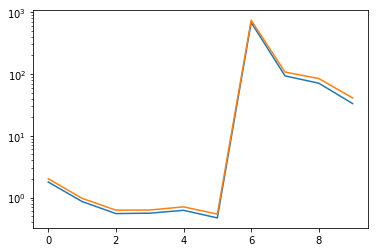

In [15]:
plt.semilogy(train_loss)
plt.semilogy(test_loss)